In [10]:
from langgraph.graph import StateGraph,START,END
from langchain_openai import ChatOpenAI
from typing import TypedDict,Annotated
from dotenv import load_dotenv
from pydantic import BaseModel,Field
import operator

In [11]:
class QuadState(TypedDict):

    a: int 
    b: int 
    c: int 

    eqn: str 
    d: float 
    result: str 

In [12]:
def show_eqn(state: QuadState):

    eqn = f"{state['a']}x2{state['b']}x{state['c']}"
    return {'eqn':eqn}

def calc_discriminant(state: QuadState):
    d = state['b']**2 - (4*state['a']*state['c'])
    return {'d':d}

def real_roots(state: QuadState):
    root1 = (-state['b']+state['d']**0.5)/(2*state['a'])
    root2 = (-state['b']-state['d']**0.5)/(2*state['a'])

    result = f'The roots are {root1} and {root2}'
    return {'result':result}

def no_real_roots(state: QuadState):

    result = f'The roots are nil'
    return {'result':result}

def repeated_roots(state: QuadState):
    root1 = (-state['b'])/(2*state['a'])

    result = f'The roots are {root1}'
    return {'result':result}

def check_condition(state: QuadState):
    if state['d']>0:
        return "real_roots"
    elif state['d']==0:
        return "repeated_roots"
    else:
        return "no_real_roots"

In [21]:
graph = StateGraph(QuadState) 

graph.add_node('show_eqn',show_eqn) 
graph.add_node('calc_discriminant',calc_discriminant)
graph.add_node('real_roots',real_roots) 
graph.add_node('no_real_roots',no_real_roots) 
graph.add_node('repeated_roots',repeated_roots) 

graph.add_edge(START,'show_eqn') 
graph.add_edge('show_eqn','calc_discriminant') 
graph.add_conditional_edges('calc_discriminant',check_condition,
    {
        'real_roots': 'real_roots',
        'repeated_roots': 'repeated_roots',
        'no_real_roots': 'no_real_roots'
    }) 
graph.add_edge('real_roots',END) 
graph.add_edge('no_real_roots',END) 
graph.add_edge('repeated_roots',END) 

app = graph.compile()


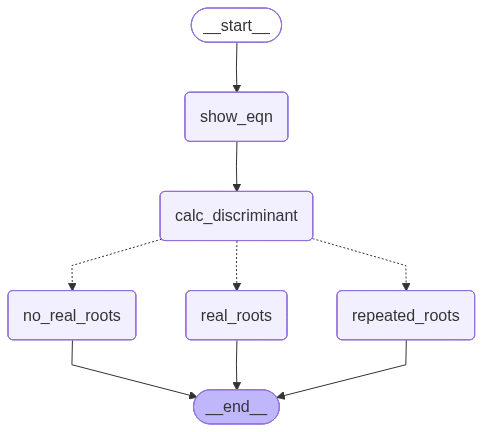

In [22]:
app

In [23]:
initial_state = {
    'a':4,
    'b':-5,
    'c':-5
}

app.invoke(initial_state)

{'a': 4,
 'b': -5,
 'c': -5,
 'eqn': '4x2-5x-5',
 'd': 105,
 'result': 'The roots are 1.9058688457449497 and -0.6558688457449497'}